# SALES ANALYSIS

In [288]:
import pandas as pd
import os

## **Task 1: Merge 12 months of sales data into a single CSV file**

In [289]:
# creates an array of file names of the selected directory
files = [file for file in os.listdir('./Sales_Data/')]

# creates an empty dataframe
all_months_data = pd.DataFrame()

# iterates through the array of file names and concatenates file data into a single variable all_months_data
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [290]:
# read from dataframe
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## **Task 2: Clean the data**

### Visualize rows with missing data

In [291]:
# visualize the rows with missing data
na_rows = all_data[all_data.isna().any(axis=1)] #axis=1 displays the original row number
na_rows.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


### Drop rows if all their values are NaN

In [292]:
# drop all rows with all its values as missing
all_data = all_data.dropna(how='all') #how='all' specifies rows where all cells are NaN
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find duplicates and drop duplicates

In [293]:
temp_df = all_data[all_data.duplicated()]
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"


In [294]:
all_data = all_data.drop_duplicates()
temp_df = all_data[all_data.duplicated()]
# temp_df.head()
# if temp_df.empty: print("Successfully cleared duplicate rows")

### Drop rows where the column names were placed as values

In [295]:
temp_df = all_data[all_data['Order ID'] == "Order ID"]
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [296]:
all_data = all_data[all_data['Order ID'] != 'Order ID']
temp_df = all_data[all_data['Order ID'] == "Order ID"]
# temp_df.head()
# if temp_df.empty: print("Successfully cleared duplicate rows")

### Convert data to correct type

In [297]:
all_data['Quantity Ordered'] = (all_data['Quantity Ordered']).astype('int32')
all_data['Price Each'] = (all_data['Price Each']).astype('double')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## **Task 3: Creating columns with useful information**

### Add a numerical column 'Month'

In [298]:
all_data['Month'] = (all_data['Order Date'].str[0:2]).astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a numerical column 'Sales Amount'

In [299]:
all_data['Sales Total'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add a string column 'Month Name'

In [300]:
import calendar
all_data['Month Name'] = all_data['Month'].apply(lambda x: calendar.month_abbr[x])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,Month Name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr


### Add a string column 'City'

In [301]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,Month Name,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles


### Add a string column 'State'

In [302]:
all_data['State'] = all_data['Purchase Address'].str[-8:-6]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,Month Name,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA


### Add a string column 'Zip'

In [303]:
all_data['Zip'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[-1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,Month Name,City,State,Zip
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001


### **Question: which months have the highest grossing? How much?**

In [304]:
top_grossing_months = all_data.groupby('Month').sum()
top_grossing_months

,Quantity Ordered,Price Each,Sales Total
Month,,,
1,10893,1.810925e+06,1.821413e+06
2,13431,2.186940e+06,2.200078e+06
3,16979,2.789085e+06,2.804973e+06
4,20536,3.366219e+06,3.389218e+06
5,18653,3.133135e+06,3.150616e+06
6,15234,2.560504e+06,2.576280e+06
7,16054,2.631225e+06,2.646461e+06
8,13429,2.226964e+06,2.241083e+06
9,13091,2.081898e+06,2.094466e+06


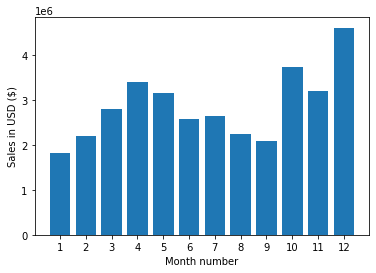

In [305]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, top_grossing_months['Sales Total'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(months)
plt.show()

### **Question: Which cities had the highest sales?**

In [306]:
top_grossing_cities = all_data.groupby('City').sum()
top_grossing_cities

,Quantity Ordered,Price Each,Month,Sales Total
City,,,,
Atlanta,16584,2.778609e+06,104649,2.794199e+06
Austin,11137,1.808340e+06,69720,1.818044e+06
Boston,22494,3.634398e+06,140898,3.658628e+06
Dallas,16707,2.750026e+06,104447,2.765374e+06
Los Angeles,33247,5.417172e+06,208020,5.448304e+06
New York City,27903,4.632921e+06,175557,4.661867e+06
Portland,14037,2.306589e+06,87636,2.319332e+06
San Francisco,50169,8.204001e+06,314949,8.254744e+06
Seattle,16534,2.730587e+06,104817,2.745046e+06


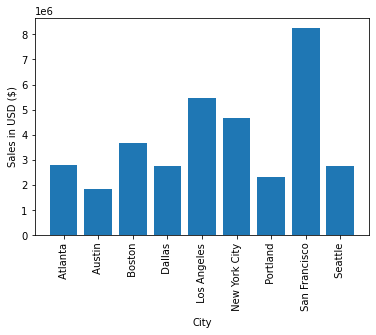

In [307]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, top_grossing_cities['Sales Total'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(cities, rotation='vertical')
plt.show()

### **Question: What time should advertisements be displayed to maximize sales?**

### Format the 'Order Date' from string to datetime

In [308]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,Month Name,City,State,Zip
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,MA,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001


### Isolate the hour of sales

In [309]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,Month Name,City,State,Zip,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,TX,75001,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,MA,02215,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,90001,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001,9


##### Isolate the minute of sales

In [310]:
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,Month Name,City,State,Zip,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,TX,75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,MA,02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001,9,27


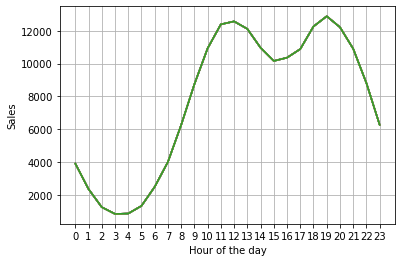

In [311]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour of the day')
plt.ylabel('Sales')
plt.grid()
plt.show()

# My recommendation for ad time placement is 11am and 6pm

#### Question: What products are often sold together?

In [313]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,Month Name,City,State,Zip,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,TX,75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,MA,02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001,9,27


In [328]:
sold_together = [product for product, df in all_data.groupby('Order ID')]
lol = all_data.groupby(['Order ID', 'Product'])
lol.head()


# hours = [hour for hour, df in all_data.groupby('Hour')]
# plt.plot(hours, all_data.groupby(['Hour']).count())
# plt.xticks(hours)
# plt.xlabel('Hour of the day')
# plt.ylabel('Sales')
# plt.grid()
# plt.show()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Total,Month Name,City,State,Zip,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Apr,Dallas,TX,75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Apr,Boston,MA,02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Apr,Los Angeles,CA,90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Apr,Los Angeles,CA,90001,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Sep,Los Angeles,CA,90001,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,Sep,San Francisco,CA,94016,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,Sep,San Francisco,CA,94016,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,Sep,San Francisco,CA,94016,17,30
